# Mattplotlib Demo

This notebook demonstrates a minimal example for each supported backend:
- Matplotlib (static)
- Seaborn (static, with theming)
- Plotly (interactive)

The package applies a consistent font (Andale Mono), colour cycle, and Matplotlib style sheet.

In [1]:
# Setup: import libraries and mattplotlib (handling local dev path)
import sys, os
from pathlib import Path

# Ensure we can import the 'mattplotlib' package if it's one directory above the repo
repo_root = Path.cwd()
parent_pkg = repo_root.parent / 'mattplotlib'
if parent_pkg.exists() and str(parent_pkg.parent) not in sys.path:
    sys.path.insert(0, str(parent_pkg.parent))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mattplotlib import apply_mpl_style, matplotlib_plots, seaborn_plots, plotly_plots

# Apply shared Matplotlib style and defaults
style_path = apply_mpl_style()
print(f'Using style: {style_path}')

# Create some example data
x = np.linspace(0, 10, 100)
y = np.sin(x)
cats = np.random.choice(list('ABC'), size=x.size)
df = pd.DataFrame({'x': x, 'y': y, 'cat': cats})
df.head()

Using style: /Users/mwarren/Library/CloudStorage/OneDrive-TheInstituteofCancerResearch/Documents/Git/mattplotlib/styles/mattplotlib.mplstyle


,x,y,cat
0,0.00000,0.000000,C
1,0.10101,0.100838,C
2,0.20202,0.200649,C
3,0.30303,0.298414,A
4,0.40404,0.393137,C


## Matplotlib example

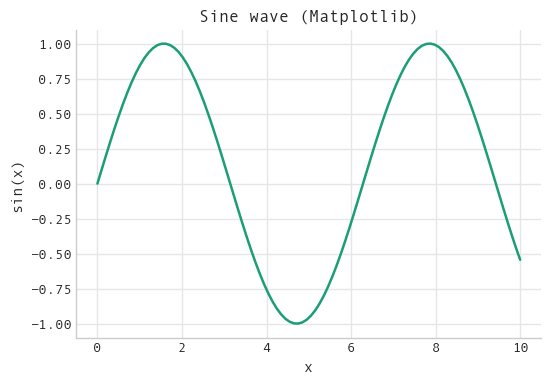

In [2]:
fig, ax = plt.subplots(figsize=(6, 4))
matplotlib_plots.line_plot(x, y, ax=ax, title='Sine wave (Matplotlib)', xlabel='x', ylabel='sin(x)')
plt.show()

## Minimal Matplotlib setup

In [1]:
try:
    from mattplotlib import apply_mpl_style, load_config
except ModuleNotFoundError:
    import sys
    from pathlib import Path
    repo_root = Path.cwd()
    candidate = repo_root.parent / "mattplotlib"
    if candidate.exists() and str(candidate.parent) not in sys.path:
        sys.path.insert(0, str(candidate.parent))
    from mattplotlib import apply_mpl_style, load_config

import matplotlib.pyplot as plt

load_config("config.serif.toml")

MattplotlibConfig(font_family='Arial', color_cycle=('#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02'), seaborn_theme={'style': 'whitegrid', 'context': 'talk', 'palette': ['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02'], 'font': 'Arial'}, plotly_template='plotly_white', matplotlib_style='/Users/mwarren/Library/CloudStorage/OneDrive-TheInstituteofCancerResearch/Documents/Git/mattplotlib/styles/mattplotlib.mplstyle')

Text(0.5, 1.0, 'Sine wave (Seaborn)')

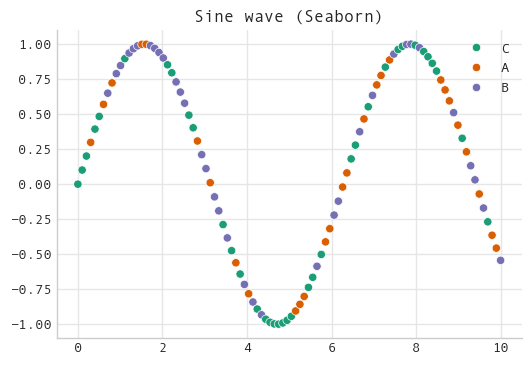

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
x = np.linspace(0, 10, 100)
y = np.sin(x)
sns.scatterplot(x=x, y=y, hue=cats, ax=ax)
ax.set_title('Sine wave (Seaborn)')

## Seaborn example

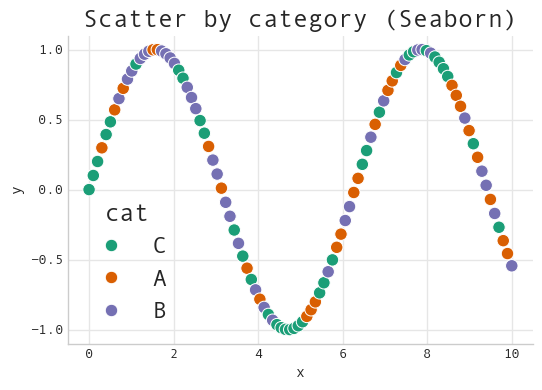

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
seaborn_plots.scatterplot(df, x='x', y='y', hue='cat', ax=ax, title='Scatter by category (Seaborn)')
plt.show()

## Plotly example

In [5]:
# Aggregate to something categorical for a bar chart
df_bar = df.groupby('cat', as_index=False)['y'].mean().rename(columns={'y': 'mean_y'})
fig = plotly_plots.bar_chart(df_bar, x='cat', y='mean_y', title='Mean sin(x) by category (Plotly)')
fig.show()